<a href="https://colab.research.google.com/github/amiranissian/ai-ml-principles-exercises/blob/main/ML-training/activeloop-deeplake/digit_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and explore the dataset
The dataset used in this exersice is a digit recognition dataset from the *ActiveLoop* dataset hub.

In [90]:
!pip install deeplake

import numpy as np
import deeplake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
ds_train = deeplake.load('hub://activeloop/fashion-mnist-test')
ds_test = deeplake.load('hub://activeloop/fashion-mnist-test')

hub://activeloop/fashion-mnist-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fashion-mnist-test
hub://activeloop/fashion-mnist-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/fashion-mnist-test


In [97]:
len(ds_train),len(ds_test)

(10000, 10000)

In [98]:
ds_test.tensors.keys()

dict_keys(['images', 'labels'])

In [99]:
ds_test.images.shape

(10000, 28, 28)

In [100]:
#download all images
ds_train.images.numpy().reshape((len(ds_train), -1)).shape

(10000, 784)

In [101]:
ds_test.labels.shape

(10000, 1)

In [102]:
ds_test.labels.info

{'class_names': {'0': 'T-shirt/top', '1': 'Trouser', '2': 'Pullover', '3': 'Dress', '4': 'Coat', '5': 'Sandal', '6': 'Shirt', '7': 'Sneaker', '8': 'Bag', '9': 'Ankle boot'}}

Tensor(key='labels', index=Index([100]))


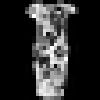

In [128]:
from PIL import Image

i = 100
print(ds_test.labels[i])
Image.fromarray(ds_test.images[i].numpy(), "L").resize((100, 100), resample=Image.NEAREST)

In [129]:
# Show the maximum value in any of the first 100 image in the dataset
np.max(ds_test.images[:100])

255

# Train a model

* Train a SVM classifier
* Evaluate the classifier

In [130]:
#download and flatten the Images
X_train = ds_train.images.numpy().reshape((len(ds_train), -1))
X_test = ds_test.images.numpy().reshape((len(ds_test), -1))

In [131]:
#download lables
y_train = ds_train.labels.numpy()
y_test = ds_test.labels.numpy() 

In [132]:
X_train.shape

(10000, 784)

In [133]:
X_test.shape

(10000, 784)

In [134]:
import numpy as np
train_idx = np.random.choice(len(y_train), replace=False, size=10_000)
train_idx = np.random.choice(len(y_train), replace=False, size=10_000)

[3]


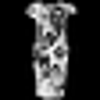

In [135]:
from PIL import Image
print(y_test[100])
Image.fromarray(X_test[100].reshape((28,28)), "L").resize((100,100))


In [136]:
# Randomly select 10k images to use for training
train_idx = np.random.choice(range(len(ds_train)), replace=False, size=10_000)

In [137]:
# Prefetch the datasets to RAM and reshape to flatten the images
# Note that we could index the training samples using train_idx before
# calling the numpy() method to download them, this would cause us to only
# download the images we are actually going to use. In this particular case
# where the images are tiny it is however faster to first download the full
# dataset and then slice it, this is due to the chunking of downloads in deeplake.
X_train = ds_train.images.numpy().reshape((len(ds_train), -1))[train_idx]
X_test = ds_test.images.numpy().reshape((len(ds_test), -1))
y_train = ds_train.labels[train_idx.tolist()].numpy().flatten()
y_test = ds_test.labels.numpy().flatten()

In [138]:
from sklearn import svm

In [139]:
model = svm.SVC()
model.fit(X_train[train_idx], y_train[train_idx])

SVC()

In [140]:
# Predict the first ten samples from the test dataset
model.predict(X_test[0:10])

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint32)

In [141]:
# Show the first ten ground truth values from the test dataset
y_test[0:10].flatten()

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint32)

In [142]:
# Compare predicted and true
model.predict(X_test[0:10]) == y_test[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [143]:
from sklearn import metrics

predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.81      0.85      0.83      1000
           3       0.85      0.92      0.88      1000
           4       0.82      0.82      0.82      1000
           5       0.97      0.95      0.96      1000
           6       0.79      0.64      0.70      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



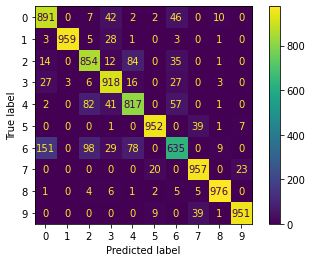

In [127]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)